<a href="https://colab.research.google.com/github/Bregella/Bregella/blob/main/AltukhovaS__modul2_fin_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данные для анализа и машинного обучения были предоставлены Kaggle. Компания по онлайн-бронированию отелей теряет доходы из-за неопределенности отмены бронирований своих клиентов. 
Необходимо помочь компании предсказать, отменит ли клиент бронирование или нет, используя предоставленный набор данных, в котором есть все детали бронирований.
Необходимо провести анализ данных, и используя модели машинного обучения попробовать предсказать, отменит ли клиент бронирование или нет.

**Импортируем библиотеки**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import datetime
from datetime import datetime, timedelta
sns.set(rc={'figure.figsize':(15,7.5)})
from datetime import datetime

Загрузка набора данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Modul2/hotel_bookings.csv')

Описание набора данных

1. hotel : Отель (Курортный отель или городской отель)

2. is_canceled : Показатель, указывающий, было ли бронирование отменено (1) или нет (0)

3. lead_time : Количество дней, прошедших между датой бронирования в PMS и датой прибытия

4. arrival_date_year : Год в дате прибытия

5. arrival_date_month : Месяц в дате прибытия

6. arrival_date_week_number : Неделя (номер) в дате прибытия

7. arrival_date_day_of_month : День в дате прибытия

8. stays_in_weekend_nights : Количество ночей в выходные дни (суббота или воскресенье), в течение которых гость останавливался или забронировал проживание в отеле

9. stays_in_week_nights : Количество ночей в неделю (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле

9. adults : Число взрослых гостей

10. children : Число детей

11. babies : Число младенцев

12. meal : Тип забронированного питания. Категории представлены в стандартных пакетах питания.

13. country : Страна происхождения гостя

14. market_segment : Обозначение сегмента рынка. В категориях термин «ТА» означает «Туристические агенты», а «ТО» означает «Туристические операторы»

15. distribution_channel : Канал распространения бронирования. Термин «ТА» означает «Туристические агенты», а «ТО» означает «Туристические операторы»

16. is_repeated_guest : Значение, указывающее, было ли это бронирование от повторного гостя (1) или нет (0)

17. previous_cancellations : Количество предыдущих бронирований, которые были отменены гостем до текущего бронирования

18. previous_bookings_not_canceled : Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования

19. reserved_room_type : Код типа зарезервированого номера. Код представлен вместо обозначения из соображений анонимности.

20. assigned_room_type : Код типа номера, присвоенного бронированию.

21. booking_changes : Количество изменений/поправок, внесенных в бронирование с момента ввода бронирования в PMS до момента заселения или отмены

22. deposit_type : Указание на то, внес ли клиент депозит для гарантии бронирования

23. agent : ID туристического агенства, которое сделало бронирование

24. company : ID компании/организации, оформившей бронирование или ответственной за оплату бронирования

25. days_in_waiting_list : Количество дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту

26. customer_type : Тип бронирования, предполагающий одну из четырех категорий

27. adr : Средняя дневная стимость, определяемая путем деления суммы всех транзакций по размещению на общее количество ночей проживания.

28. required_car_parking_spaces : Требуемое гостем количество парковочных мест

29. total_of_special_requests : Количество особых пожеланий клиента (например, две односпальные кровати или верхний этаж)

30. reservation_status : Последний статус бронирования, предполагающий одну из трех категорий: Canceled – бронирование было отменено клиентом
Check-Out – клиент зарегистрировался, но уже выписался из отеля
No-Show – клиент не зарегистрировался и сообщил о причине

31. reservation_status_date : Дата, когда был установлен последний статус бронирования. Эту переменную можно использовать в сочетании с ReservationStatus, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля

**EDA и подготовка данных**

In [ ]:
df.head(-3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

В Датасете есть числовые и категориальные признаки

In [ ]:
#Посмотрим статистику для числовых признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Наблюдаем большой разрыв между максимумом и 75 квантилем следующих признаков: lead_time, stays_in_week_nights, previous_bookings_not_canceled, days_in_waiting_list, adr

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print(df.duplicated().sum())

31994


В Датасете есть дублированные строки

In [ ]:
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [ ]:
# Уберем дублированные строки (данные)
df = df.drop_duplicates()
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.count()

hotel                             87396
is_canceled                       87396
lead_time                         87396
arrival_date_year                 87396
arrival_date_month                87396
arrival_date_week_number          87396
arrival_date_day_of_month         87396
stays_in_weekend_nights           87396
stays_in_week_nights              87396
adults                            87396
children                          87392
babies                            87396
meal                              87396
country                           86944
market_segment                    87396
distribution_channel              87396
is_repeated_guest                 87396
previous_cancellations            87396
previous_bookings_not_canceled    87396
reserved_room_type                87396
assigned_room_type                87396
booking_changes                   87396
deposit_type                      87396
agent                             75203
company                            5259


Количество строк в датасете сократилось с 119390 до 87396

In [ ]:
# Посмотрим есть ли пропущенные значения в данных
print(df.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


Из приведенного выше анализа видно, что в столбцах "Agent" и "Company" много пропущенных значений. В столбцах "Children" и "Country" также пропущено некоторое количество значений.

Из описания набора данных можно сделать вывод, что нулевые значения для "Agent" и "Company" подразумевают, что заказ был сделан частным лицом.

Обрабатываем пропущенные значения

In [ ]:
#Параметр 'children' в формате float, нам необходимо изменить формат параметра на int и заполнить пропущенные значения 0
df["children"]=df["children"].fillna(0.0).astype(int)

In [ ]:
# Нулевые значения в столбце "Country" можно заменить на Unknown
df['country'] = df['country'].fillna('Unknown')

In [ ]:
# Нулевые значения в столбцах "Agent" и "Company"
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

In [ ]:
# Проверяем, есть ли пропущенные значения
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Проанализируем целевой показатель is_canceled - отмененное бронирование

In [ ]:
df['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

Параметр бинарный, имеет числовой формат. Необходимо перевести параметр в категориальный формат. Дисбаланс классов 73% - нет. 27% - да

In [ ]:
df["is_canceled"] = df["is_canceled"].astype('object')

Построим гистограммы для параметров, чтобы посмотреть на данные

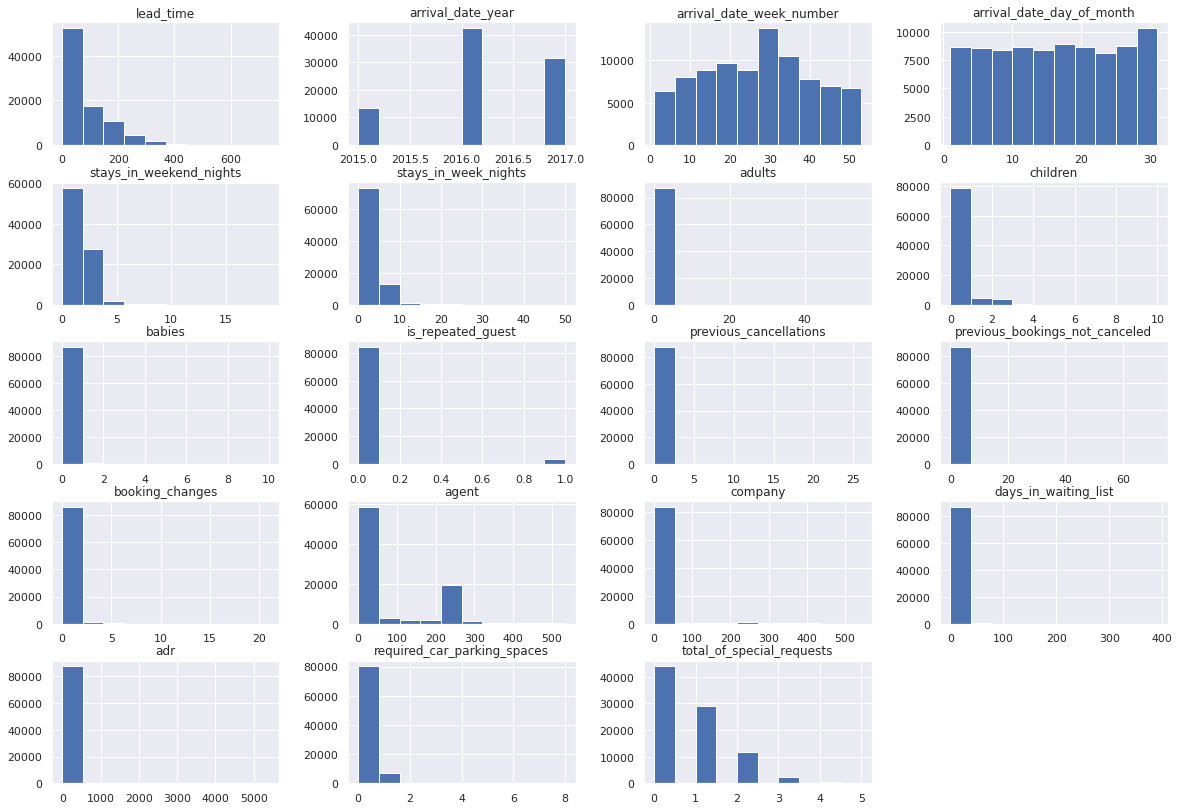

In [ ]:
df.hist(figsize=(20,14))
plt.show()

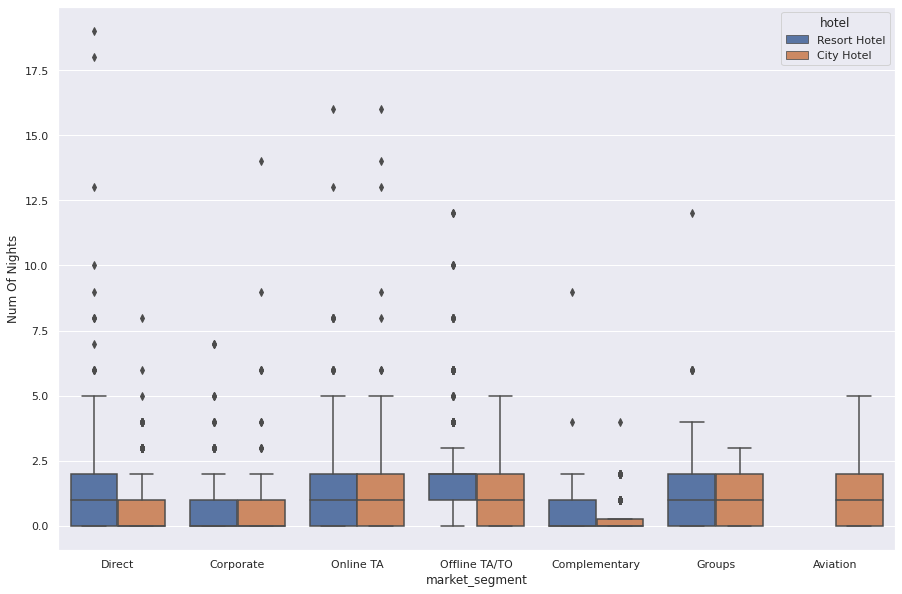

In [ ]:
#Распределение бронирований в отелях в зависимости от того, каким образом было сделано бронирование и типа отелей
plt.figure(figsize=(15,10))
sns.boxplot(data=df[df['is_canceled'] == 0],x='market_segment',y='stays_in_weekend_nights',hue='hotel')
plt.ylabel('Num Of Nights')
plt.show()

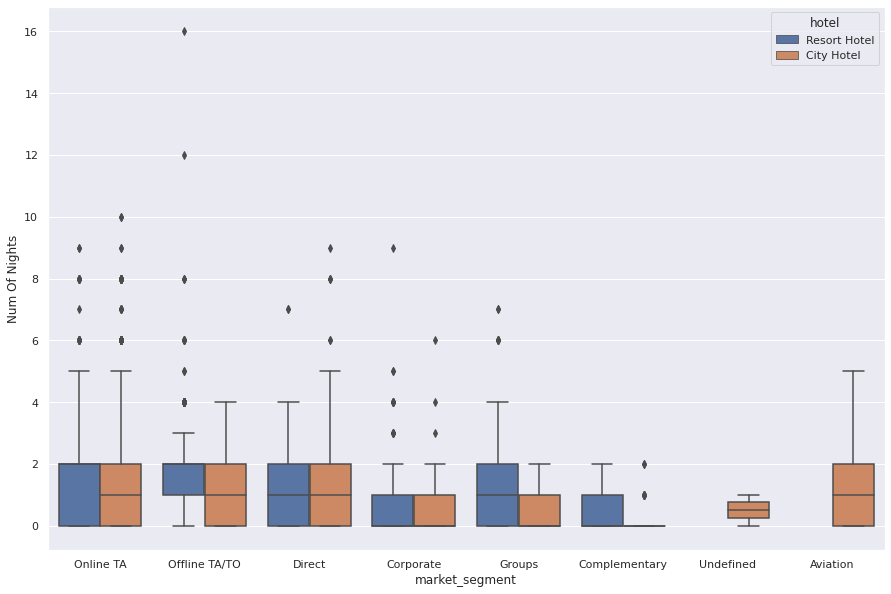

In [ ]:
#Распределение отменненных бронирований в отелях в зависимости от того, каким образом было сделано бронирование и типа отелей
plt.figure(figsize=(15,10))
sns.boxplot(data=df[df['is_canceled'] == 1],x='market_segment',y='stays_in_weekend_nights',hue='hotel')
plt.ylabel('Num Of Nights')
plt.show()

Есть зависимость отмен бронирования от того, каким образом было сделано бронирование, и от типа отелей, которые бронировались

Посмотрим как клиенты предпочитают делать бронирование

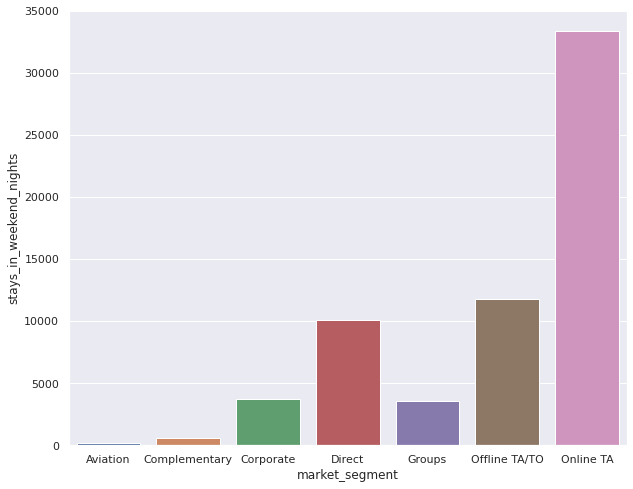

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count())

Онлайн-турагентства — лучший выбор для бронирования отелей клиентами.

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
px.pie(data_frame=df[df['is_canceled']==0],names=df['meal'].value_counts().index,values=df['meal'].value_counts())

Большинство клиентов предпочитают бронировать питание формата BB - завтрак включен в стоимость. 

Посмотрим на взаимосвязь между особыми запросами клиентов и отменой бронирований

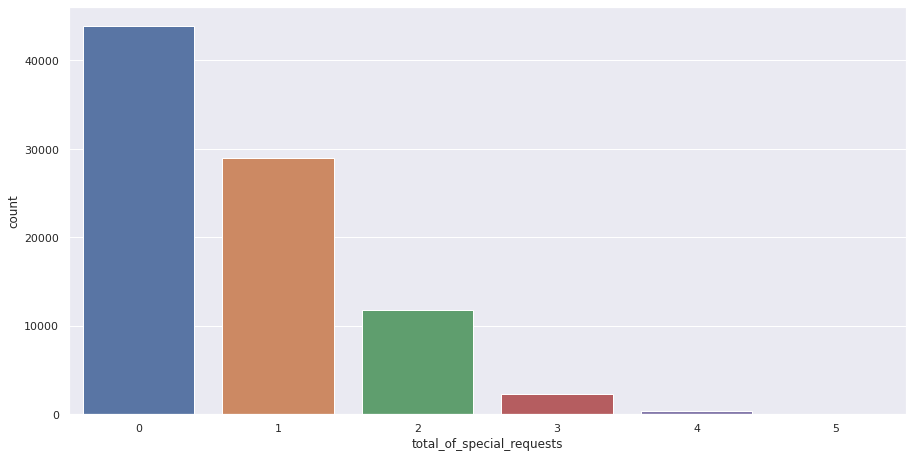

In [ ]:
sns.countplot(x=df.total_of_special_requests)  

In [ ]:
100 * len(df[df['total_of_special_requests'] == 0]) / len(df)

50.224266556821824

Практически 50% от всех бронирований - без специальных запросов

In [ ]:
df.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).unstack()

total_of_special_requests       
is_canceled                                       0      1
total_of_special_requests                                 
0                                             29320  14574
1                                             22514   6503
2                                              9297   2515
3                                              1920    397
4                                               286     34
5                                                34      2

Параметр специальные запросы равномерно присутстует и в состоявшихся бронированиях, и в отмененных

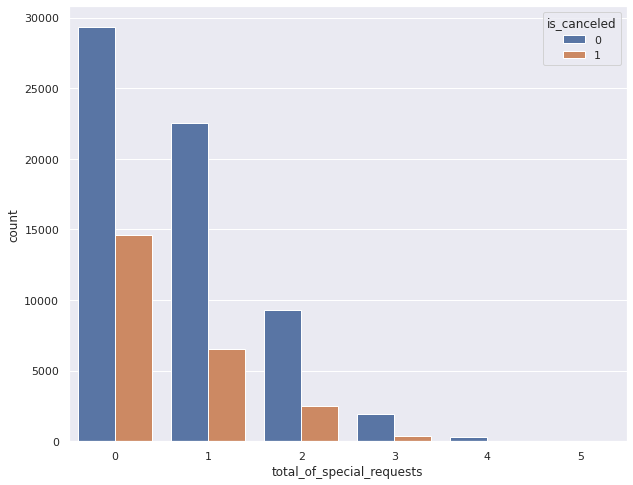

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='total_of_special_requests',hue='is_canceled')

Посмотрим, какие наиболее популярные месяцы среди клиентов

In [ ]:
df.arrival_date_year.unique()

array([2015, 2016, 2017])

In [ ]:
df.arrival_date_month.value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

Вполне естественно, что летний сезон наиболее популярен у клиентов

Посмотрим как зависит вероятность отмены бронирования от количества дней, прошедших между датой бронирования в системе и датой прибытия (изменения статуса в системе бронирования)

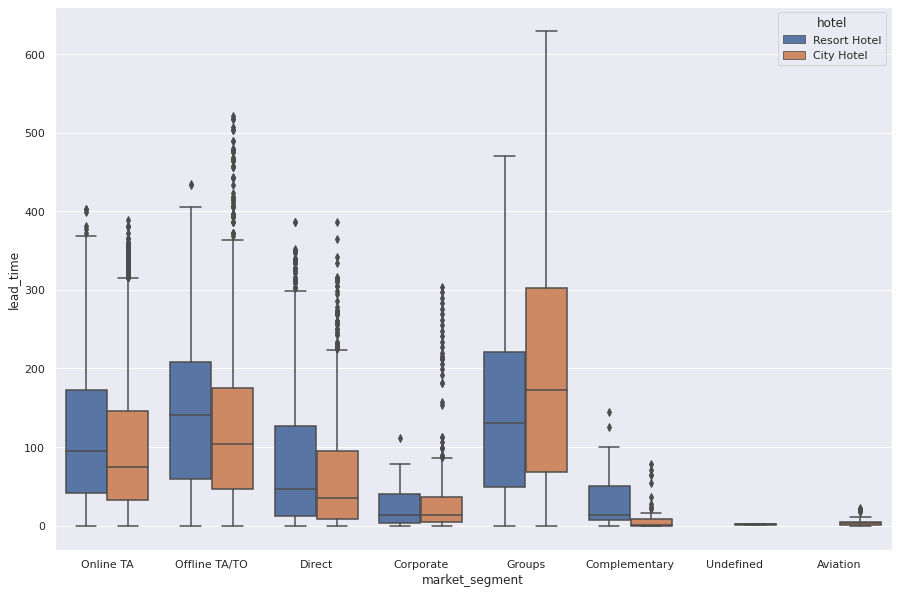

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[df['is_canceled'] == 1],x='market_segment',y='lead_time',hue='hotel')
plt.ylabel('lead_time')
plt.show()

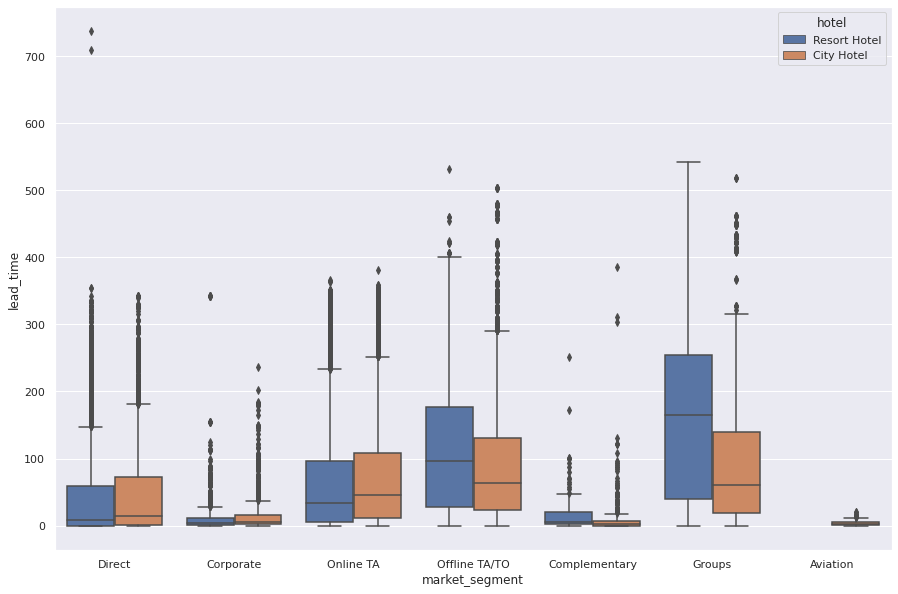

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[df['is_canceled'] == 0],x='market_segment',y='lead_time',hue='hotel')
plt.ylabel('lead_time')
plt.show()

Чем больше период между датой бронирования и датой прибытия в отель, тем больше вероятности, что бронирование будет отменено. В параметре lead_time наблюдаем большие выбросы.

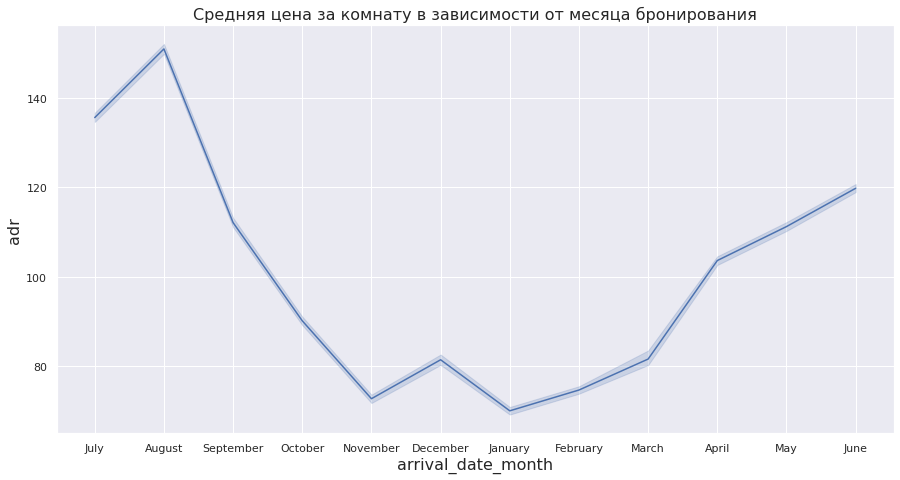

In [ ]:
sns.lineplot( x='arrival_date_month' , y ='adr', data=df)
plt.title("Средняя цена за комнату в зависимости от месяца бронирования", fontsize=16)
plt.xlabel("arrival_date_month", fontsize=16)
plt.ylabel("adr", fontsize=16)
plt.show()

Видим, что средняя цена за номер в отеле сильно зависит от сезонности

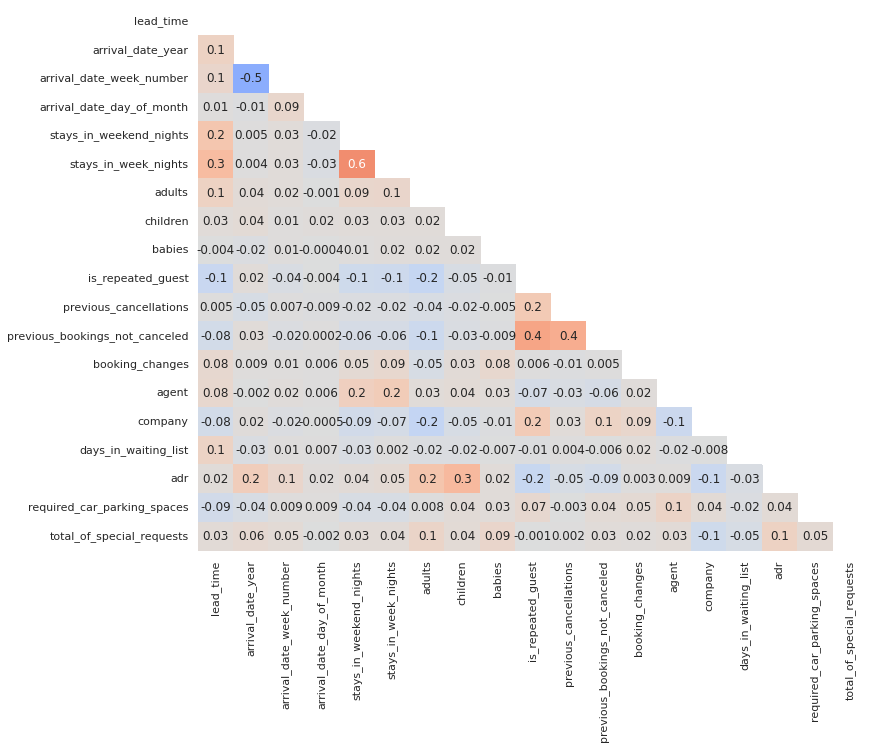

In [ ]:
# Посмотрим на корреляцию между числовыми признаками
sns.set_style('white')
plt.figure(figsize = (12,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot = True, fmt='.1g', mask=matrix, vmin=-1,
            vmax=1, center= 0, cmap= 'coolwarm', cbar=False)

Целевой параметр is_canceled очень слабо коррелирован со всеми признаками кроме lead_time и adr. Можем наблюдать сильную корреляцию между признаками: 0.6 - stays_in_week_nights и stays_in_weekend_nights; 0.4 - previous_booking_not_canceled и previous_cancelation, is_repeated_guest; -0.5 - arrival_date_week_number и arrival_date_year.

Посмотрим на связь между параметрами is_canceled и reservation_status.

In [ ]:
df.is_canceled.value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

In [ ]:
df.reservation_status.value_counts()

Check-Out    63371
Canceled     23011
No-Show       1014
Name: reservation_status, dtype: int64

Видим, что когда параметр is_canceled принимает значение 1 (т.е. бронировние было отменено) - параметр reservation_status принимает значение Canceled. Существут линейная зависимость. Параметр reservation_status необходимо удалить из данных.

In [ ]:
# Поскольку между значениями "Reservation_status" и "Is_canceled" существует сильная линейная зависимость, необходимо убрать из Дата Фрейма параметр "Reservation_status"
df=df.drop(columns = ['reservation_status'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  object 
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
# Объединим параметры год, месяц и день прибытия в отель в один параметр Дата прибытия
df['arrival_date'] = df[["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]].apply(lambda x: '/'.join(x.dropna().astype(str)),axis=1)

In [ ]:
#df.info()

In [ ]:
# Объединим параметры Взрослые, дети и младенцы в один параметр Общее число гостей - Total Guests
df["Total_Guests"]=df["adults"]+df["children"]+df['babies']

In [ ]:
df=df.drop(columns = ['adults', 'children', 'babies'])

In [ ]:
#df.info()

In [ ]:
# Создадим новый параметр Сезон
def season(x):
    if x in ['December','January','February']:
        return "Winter"
    if x in['March','April','May']:
        return "Spring"
    if x in['June','July', 'August']:
        return "Summer"
    if x in['September', 'October', 'November']:
        return "Autum"

In [ ]:
df['Seasons']=df['arrival_date_month'].apply(season)

In [ ]:
df=df.drop(columns = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month'])

In [ ]:
#df.info()

In [ ]:
# Объеденим параметры Количество забронированных ночей в выходные и Количество забронированных ночей в будни
df["Total_Days"]=df["stays_in_weekend_nights"]+df["stays_in_week_nights"]

In [ ]:
df=df.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights'])

In [ ]:
#df.info()

Также мы удалим параметры, имеющие большую корреляцию с другими признаками previous_booking_not_canceled; arrival_date_week_number

In [ ]:
df=df.drop(columns = ['previous_bookings_not_canceled', 'arrival_date_week_number'])

In [ ]:
#df.info()

In [ ]:
# Следующие признаки, имеющие очень низкую корреляцию с целевым признаком, мы также можем удалить
df = df.drop(columns=['days_in_waiting_list', 'assigned_room_type', 'booking_changes'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87396 non-null  object 
 1   is_canceled                  87396 non-null  object 
 2   lead_time                    87396 non-null  int64  
 3   meal                         87396 non-null  object 
 4   country                      87396 non-null  object 
 5   market_segment               87396 non-null  object 
 6   distribution_channel         87396 non-null  object 
 7   is_repeated_guest            87396 non-null  int64  
 8   previous_cancellations       87396 non-null  int64  
 9   reserved_room_type           87396 non-null  object 
 10  deposit_type                 87396 non-null  object 
 11  agent                        87396 non-null  float64
 12  company                      87396 non-null  float64
 13  customer_type  

В итого наш Датасет сократился до 22 параметров

In [ ]:
# Посмотрим на категориальные параметры
a = df.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, df[i].nunique())
    cat_list.append(i)

hotel 2
is_canceled 2
meal 5
country 178
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4
reservation_status_date 926
arrival_date 793
Seasons 4


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for i in cat_list:
    df[i] = le.fit_transform(df[i])

Мы подготовили данные в числовом формате для дальнейшего построения моделей

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87396 non-null  int64  
 1   is_canceled                  87396 non-null  int64  
 2   lead_time                    87396 non-null  int64  
 3   meal                         87396 non-null  int64  
 4   country                      87396 non-null  int64  
 5   market_segment               87396 non-null  int64  
 6   distribution_channel         87396 non-null  int64  
 7   is_repeated_guest            87396 non-null  int64  
 8   previous_cancellations       87396 non-null  int64  
 9   reserved_room_type           87396 non-null  int64  
 10  deposit_type                 87396 non-null  int64  
 11  agent                        87396 non-null  float64
 12  company                      87396 non-null  float64
 13  customer_type  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

Определяем целевую переменную is_canceled как y. Убираем из параметров Датасета

In [ ]:
y=df['is_canceled']
X=df.drop('is_canceled',axis=1)

In [ ]:
print(X.shape) 
print(y.shape) 

(87396, 21)
(87396,)


Разделим Дата Фрейм на два: обучающий и тестовый

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.3)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

61177
26219
61177
26219


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Создание моделей машинного обучения. Использование моделей с "учителем"**

SKLearn Logistic Regresion

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
predicted = log_reg.predict(X_test)
acc_log= accuracy_score(predicted,y_test)
print ('Test Accuracy : {:.2f}%'.format(acc_log*100))

Test Accuracy : 80.08%


In [ ]:
print("The R-squared value is: {0:0.4f}".format(log_reg.score(X_test, y_test)))

The R-squared value is: 0.8008


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     19002
           1       0.74      0.43      0.54      7217

    accuracy                           0.80     26219
   macro avg       0.78      0.68      0.71     26219
weighted avg       0.79      0.80      0.78     26219



SKLearn Dessision Tree Classifier

In [ ]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
predicted = model_dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, predicted)
print ('Test Accuracy : {:.2f}%'.format(acc_dtc*100))

Test Accuracy : 90.51%


In [ ]:
print("The R-squared value is: {0:0.4f}".format(model_dtc.score(X_test, y_test)))

The R-squared value is: 0.9051


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     19002
           1       0.83      0.83      0.83      7217

    accuracy                           0.91     26219
   macro avg       0.88      0.88      0.88     26219
weighted avg       0.91      0.91      0.91     26219



SKLearn Random Forest

In [ ]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
predicted = model_rfc.predict(X_test)
acc_rfc = accuracy_score(predicted, y_test)
print ('Test Accuracy : {:.2f}%'.format(acc_rfc*100))

Test Accuracy : 91.64%


In [ ]:
print("The R-squared value is: {0:0.4f}".format(model_rfc.score(X_test, y_test)))

The R-squared value is: 0.9164


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     19002
           1       0.91      0.77      0.84      7217

    accuracy                           0.92     26219
   macro avg       0.92      0.87      0.89     26219
weighted avg       0.92      0.92      0.91     26219



SKLearn Градиентный бустинг

In [ ]:
import xgboost as xgb
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier
import time

XGBR = XGBClassifier(random_state=1234)
XGBR.fit(X_train, y_train)

gbm_models = [GradientBoostingClassifier(learning_rate=0.5, n_estimators=50, max_depth=10, random_state=1234), 
              LGBMClassifier(max_depth=10, learning_rate=0.5, n_estimators=50, random_state=1234),
              HistGradientBoostingClassifier(learning_rate=0.5, max_iter=100, max_depth=10, random_state=1234)]

for gbm in gbm_models:
    start_time = time.time()
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    print('Model: {} \n R2 score on testing data: {:.2f}% \n Execution time: {:.2}sec'.format(
          gbm.__class__.__name__, 100*r2_score(y_test, y_pred), time.time()-start_time))

Model: GradientBoostingClassifier 
 R2 score on testing data: 84.74% 
 Execution time: 1.9e+01sec
Model: LGBMClassifier 
 R2 score on testing data: 73.79% 
 Execution time: 0.86sec
Model: HistGradientBoostingClassifier 
 R2 score on testing data: 76.45% 
 Execution time: 1.9sec


Показатель R2 для Gradient Boosting Classifier - наилучший из трех моделей. 

In [ ]:
GBoost = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100, max_depth=10, random_state=1234)
GBoost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, random_state=1234)

In [ ]:
predicted_GBoost = GBoost.predict(X_test)
print('R2 score on testing data: {:.2f}'.format(r2_score(y_test, predicted_GBoost)))
rmse = np.sqrt(mean_squared_error(y_test, predicted_GBoost))
print("RMSE: %f" % (rmse))

R2 score on testing data: 0.87
RMSE: 0.157936


In [ ]:
print(classification_report(y_test, predicted_GBoost))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19002
           1       0.98      0.92      0.95      7217

    accuracy                           0.98     26219
   macro avg       0.98      0.96      0.97     26219
weighted avg       0.98      0.98      0.97     26219



### **Результат использования моделей SKLearn**

Logistic Regresion: Test Accuracy : 80.08%; f1-score 0 - 0.87, 1 -0.54 

Dessision Tree Classifier: Test Accuracy : 90.70%; f1-score 0 - 0.94 1 -0.83

Random Forest: Test Accuracy : 91,64%; f1-score 0 - 0.94 1 -0.84

Gradient Boosting Classifier: Test Accuracy: 98%; f1-score 0 - 0.98 1 -0.95

Наилучший результат показала модель **Gradient Boosting Classifier**

## **Модели машинного обучения**

У нас есть подготовленный для машинного обучения Датасет. Разделим его на 2 Датасета.

In [ ]:
from numpy.random import RandomState
#Разделим наш набор данных на разные датасеты
rng=RandomState()
train= df.sample(frac=0.7, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

In [ ]:
train

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,...,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,Total_Guests,Seasons,Total_Days
27075,1,0,11,0,59,6,3,0,0,0,...,0.0,2,158.73,0,1,536,219,2,2,5
67619,0,1,58,3,43,6,3,0,0,0,...,0.0,2,126.00,0,0,742,788,2,1,3
35981,1,0,221,2,59,4,3,0,0,3,...,0.0,3,83.43,0,0,797,573,2,1,7
68916,0,1,232,2,12,6,3,0,0,3,...,0.0,2,167.76,0,1,589,776,3,1,5
6187,1,0,204,0,76,6,3,0,0,0,...,0.0,2,57.28,0,2,459,447,2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26248,1,0,83,0,15,6,3,0,0,3,...,0.0,2,192.00,0,1,512,349,2,2,5
27843,1,0,228,0,59,6,3,0,0,5,...,0.0,2,87.59,0,1,561,546,2,0,7
4519,1,1,60,0,135,6,3,0,0,4,...,0.0,2,83.40,0,1,348,411,2,1,5
17343,1,0,1,0,133,6,3,0,0,0,...,0.0,2,67.00,0,0,223,150,2,0,5


In [ ]:
test

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,...,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,Total_Guests,Seasons,Total_Days
0,1,0,342,0,135,3,1,0,0,2,...,0.0,2,0.00,0,0,121,62,2,2,0
1,1,0,737,0,135,3,1,0,0,2,...,0.0,2,0.00,0,0,121,62,2,2,0
16,1,0,37,0,135,5,3,0,0,4,...,0.0,0,97.50,0,0,125,62,2,2,4
18,1,0,0,0,56,2,0,0,0,0,...,110.0,2,107.42,0,0,122,62,2,2,1
21,1,0,72,0,135,3,1,0,0,0,...,0.0,2,84.67,0,1,127,62,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119375,0,0,200,0,12,5,3,0,0,0,...,0.0,2,85.50,0,1,917,603,2,2,5
119379,0,0,109,0,59,6,3,0,0,3,...,0.0,2,155.00,0,1,917,604,2,2,4
119381,0,0,188,0,43,3,1,0,0,0,...,0.0,2,99.00,0,0,918,604,2,2,5
119386,0,0,102,0,56,6,3,0,0,4,...,0.0,2,225.43,0,2,920,604,3,2,7


In [ ]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

Мы используем уже подготовленный (очищенный) набор данных. Посмотрим на него, и перейдем к обучению модели

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61177 entries, 27075 to 93538
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        61177 non-null  int64  
 1   is_canceled                  61177 non-null  int64  
 2   lead_time                    61177 non-null  int64  
 3   meal                         61177 non-null  int64  
 4   country                      61177 non-null  int64  
 5   market_segment               61177 non-null  int64  
 6   distribution_channel         61177 non-null  int64  
 7   is_repeated_guest            61177 non-null  int64  
 8   previous_cancellations       61177 non-null  int64  
 9   reserved_room_type           61177 non-null  int64  
 10  deposit_type                 61177 non-null  int64  
 11  agent                        61177 non-null  float64
 12  company                      61177 non-null  float64
 13  customer_typ

In [ ]:
train.describe()

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,...,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,Total_Guests,Seasons,Total_Days
count,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,...,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000,61177.000000
mean,0.387564,0.272145,79.842702,0.560031,87.021005,5.072429,2.525606,0.038462,0.028736,1.259215,...,11.158736,2.057358,106.358097,0.084509,0.696520,548.051523,437.865064,2.028851,1.483106,3.622407
std,0.487198,0.445068,85.949254,1.082692,44.958846,1.345906,0.946110,0.192311,0.340373,1.832816,...,54.687386,0.529929,56.304017,0.283103,0.829896,216.425161,218.868204,0.828008,1.020587,2.746062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,11.000000,0.000000,51.000000,4.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,72.000000,0.000000,0.000000,382.000000,249.000000,2.000000,1.000000,2.000000
50%,0.000000,0.000000,49.000000,0.000000,75.000000,6.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,98.100000,0.000000,0.000000,556.000000,454.000000,2.000000,2.000000,3.000000
75%,1.000000,1.000000,125.000000,0.000000,135.000000,6.000000,3.000000,0.000000,0.000000,3.000000,...,0.000000,2.000000,134.000000,0.000000,1.000000,733.000000,621.000000,2.000000,2.000000,5.000000
max,1.000000,1.000000,709.000000,4.000000,177.000000,7.000000,4.000000,1.000000,25.000000,9.000000,...,543.000000,3.000000,5400.000000,8.000000,5.000000,925.000000,792.000000,55.000000,3.000000,69.000000


In [ ]:
# Создадим обучающий набор для моделирования и набор для проверки производительности модели
X_1 = train.drop(['is_canceled'], axis=1) # Удаляем целевой параметр из набора
y_1 = train.is_canceled
from sklearn.model_selection import train_test_split
X_1_train, X_1_validation, y_1_train, y_1_validation = train_test_split(X_1, y_1, train_size=0.7, random_state=1234)

In [ ]:
#Посмотрели форматы столбцов
X_1.dtypes

hotel                            int64
lead_time                        int64
meal                             int64
country                          int64
market_segment                   int64
distribution_channel             int64
is_repeated_guest                int64
previous_cancellations           int64
reserved_room_type               int64
deposit_type                     int64
agent                          float64
company                        float64
customer_type                    int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status_date          int64
arrival_date                     int64
Total_Guests                     int64
Seasons                          int64
Total_Days                       int64
dtype: object

Используя CatBoost мы можем не указывать на категориальные столбцы. 

In [ ]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=100, learning_rate=0.5, depth=10)
model.fit(X_1_train, y_1_train,eval_set=(X_1_validation, y_1_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4699719	test: 0.4709512	best: 0.4709512 (0)	total: 39.2ms	remaining: 3.88s
1:	learn: 0.3794935	test: 0.3844317	best: 0.3844317 (1)	total: 97.9ms	remaining: 4.8s
2:	learn: 0.3448424	test: 0.3519094	best: 0.3519094 (2)	total: 154ms	remaining: 4.98s
3:	learn: 0.3180587	test: 0.3261739	best: 0.3261739 (3)	total: 205ms	remaining: 4.92s
4:	learn: 0.3047303	test: 0.3133181	best: 0.3133181 (4)	total: 259ms	remaining: 4.91s
5:	learn: 0.2911277	test: 0.3017728	best: 0.3017728 (5)	total: 309ms	remaining: 4.84s
6:	learn: 0.2738783	test: 0.2864390	best: 0.2864390 (6)	total: 393ms	remaining: 5.22s
7:	learn: 0.2591363	test: 0.2717783	best: 0.2717783 (7)	total: 505ms	remaining: 5.81s
8:	learn: 0.2506641	test: 0.2648745	best: 0.2648745 (8)	total: 644ms	remaining: 6.51s
9:	learn: 0.2398674	test: 0.2540765	best: 0.2540765 (9)	total: 769ms	remaining: 6.92s
10:	learn: 0.2362302	test: 0.2515583	best: 0.2515583 (10)	total: 831ms	remaining: 6.72s
11:	learn: 0.2280797	test: 0.2436394	best: 0.243639

In [ ]:
from sklearn.metrics import r2_score 
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_1_train,model.predict(X_1_train)))) 

The R-squared value is: 0.8928 



In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_1_validation,model.predict(X_1_validation)))) 

The R-squared value is: 0.7300 



# XGBoost

In [ ]:
# Создадим обучающий набор для моделирования и набор для проверки производительности модели
X_1 = train.drop(['is_canceled'], axis=1) # Удаляем целевой параметр из набора
y_1 = train.is_canceled
from sklearn.model_selection import train_test_split
X_1_train, X_1_validation, y_1_train, y_1_validation = train_test_split(X_1, y_1, train_size=0.7, random_state=1234)

In [ ]:
import xgboost as xgb
data_dmatrix_2 = xgb.DMatrix(data=X_1,label=y_1)

In [ ]:
xg_reg = xgb.XGBClassifier(max_depth=10, learning_rate=0.5, n_estimators=100)

In [ ]:
xg_reg.fit(X_1_train,y_1_train)

XGBClassifier(learning_rate=0.5, max_depth=10)

In [ ]:
preds_1 = xg_reg.predict( X_1_train)

In [ ]:
# Показатель для тренировочных данных
print("The R-squared value is: {0:0.4f} \n".format(r2_score(preds_1,y_1_train)))

The R-squared value is: 0.9992 



In [ ]:
preds_2 = xg_reg.predict( X_1_validation)

In [ ]:
print(xg_reg.predict(X_1_validation))

[1 0 1 ... 1 0 0]


In [ ]:
print(xg_reg.score(X_1_train,y_1_train))

0.9998365364406978


In [ ]:
print(xg_reg.score(X_1_validation,y_1_validation))

0.9644764084123352


In [ ]:
# Показатель на тестовых данных
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_1_validation,preds_2)))

The R-squared value is: 0.8207 



# LightGBM

In [ ]:
# Создадим обучающий набор для моделирования и набор для проверки производительности модели
X = train.drop(['is_canceled'], axis=1) 
y = train.is_canceled
from sklearn.model_selection import train_test_split
X_train_1, X_validation_1, y_train_1, y_validation_1 = train_test_split(X, y, train_size=0.7, random_state=1234)

In [ ]:
X_train_1.info(), X_validation_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42823 entries, 41540 to 63100
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        42823 non-null  int64  
 1   lead_time                    42823 non-null  int64  
 2   meal                         42823 non-null  int64  
 3   country                      42823 non-null  int64  
 4   market_segment               42823 non-null  int64  
 5   distribution_channel         42823 non-null  int64  
 6   is_repeated_guest            42823 non-null  int64  
 7   previous_cancellations       42823 non-null  int64  
 8   reserved_room_type           42823 non-null  int64  
 9   deposit_type                 42823 non-null  int64  
 10  agent                        42823 non-null  float64
 11  company                      42823 non-null  float64
 12  customer_type                42823 non-null  int64  
 13  adr         

(None, None)

In [ ]:
# Создаем датасет для lightgbm
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train_1,y_train_1)
lgb_eval = lgb.Dataset(X_validation_1,y_validation_1, reference=lgb_train)


In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0}

print('Starting training...')
# тренируем
gbm = lgb.train(params,
                lgb_train,
                #categorical_feature='auto',
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# предсказываем
y_pred_3 = gbm.predict(X_validation_1, num_iteration=gbm.best_iteration)
# тестируем
print('The rmse of prediction is:', mean_squared_error(y_validation_1, y_pred_3) ** 0.5)

Starting training...
[1]	valid_0's l2: 0.152091	valid_0's l1: 0.333594
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.117084	valid_0's l1: 0.272166
[3]	valid_0's l2: 0.107916	valid_0's l1: 0.246657
[4]	valid_0's l2: 0.0966858	valid_0's l1: 0.21943
[5]	valid_0's l2: 0.0899686	valid_0's l1: 0.205793
[6]	valid_0's l2: 0.0852903	valid_0's l1: 0.198691
[7]	valid_0's l2: 0.0839343	valid_0's l1: 0.197557
[8]	valid_0's l2: 0.0796615	valid_0's l1: 0.189019
[9]	valid_0's l2: 0.0777657	valid_0's l1: 0.186044
[10]	valid_0's l2: 0.0771175	valid_0's l1: 0.185358
[11]	valid_0's l2: 0.0750005	valid_0's l1: 0.181056
[12]	valid_0's l2: 0.074847	valid_0's l1: 0.180429
[13]	valid_0's l2: 0.0733498	valid_0's l1: 0.177647
[14]	valid_0's l2: 0.0729061	valid_0's l1: 0.176764
[15]	valid_0's l2: 0.0722118	valid_0's l1: 0.175511
[16]	valid_0's l2: 0.0718468	valid_0's l1: 0.175059
[17]	valid_0's l2: 0.0691145	valid_0's l1: 0.171292
[18]	valid_0's l2: 0.0688779	valid_0's l1: 0.170

In [ ]:
y_pred_3

array([ 1.04335487,  0.03051029,  1.01723974, ...,  0.90896805,
       -0.05311043,  0.12472579])

In [ ]:
# Показатель для обучающих данных
from sklearn.metrics import r2_score 
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_train_1,gbm.predict(X_train_1)))) 

The R-squared value is: 0.8026 



In [ ]:
# Показатель на тестовых данных
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_validation_1,y_pred_3)))

The R-squared value is: 0.7283 



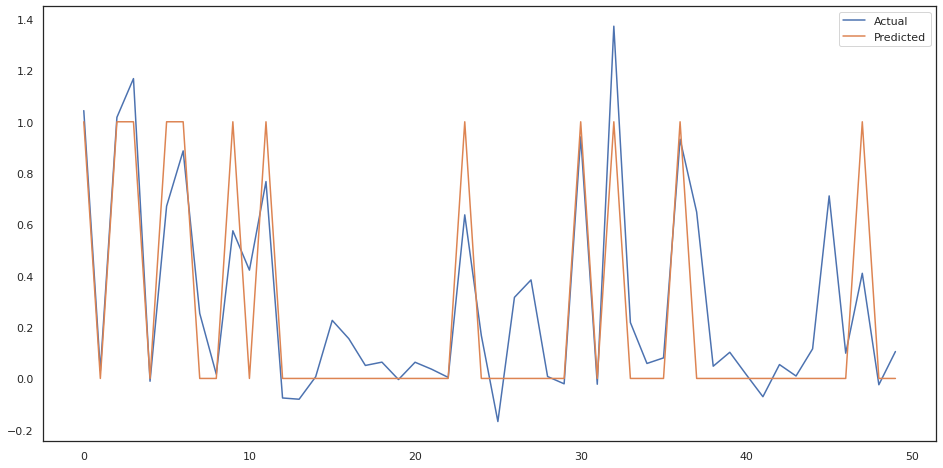

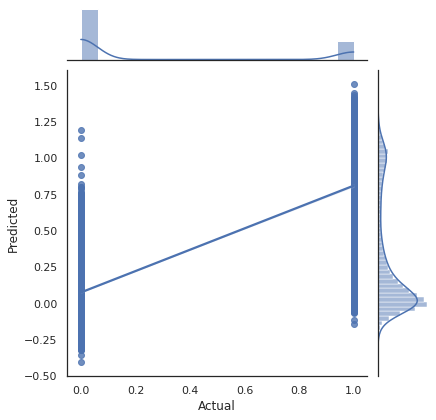

In [ ]:
test = pd.DataFrame({'Predicted':y_pred_3,'Actual':y_validation_1})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

Второй вариант LightGBM

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train_1,y_train_1)
lgb_test = lgb.Dataset(X_validation_1,y_validation_1, reference=lgb_train)

# specify your configurations as a dict
params = {
    'num_leaves': 10,
    'metric': ('l1', 'l2'),
    'verbose': 0}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                evals_result=evals_result,
                verbose_eval=10)

Starting training...
[10]	training's l2: 0.146015	training's l1: 0.324776	valid_1's l2: 0.146727	valid_1's l1: 0.325473
[20]	training's l2: 0.122072	training's l1: 0.281297	valid_1's l2: 0.123389	valid_1's l1: 0.28298
[30]	training's l2: 0.11234	training's l1: 0.259676	valid_1's l2: 0.114098	valid_1's l1: 0.261938
[40]	training's l2: 0.104487	training's l1: 0.242948	valid_1's l2: 0.106391	valid_1's l1: 0.245497
[50]	training's l2: 0.0982837	training's l1: 0.230201	valid_1's l2: 0.100399	valid_1's l1: 0.233022
[60]	training's l2: 0.0946749	training's l1: 0.223324	valid_1's l2: 0.0969836	valid_1's l1: 0.226271
[70]	training's l2: 0.0920975	training's l1: 0.218748	valid_1's l2: 0.0945796	valid_1's l1: 0.221711
[80]	training's l2: 0.0895695	training's l1: 0.214432	valid_1's l2: 0.0923723	valid_1's l1: 0.217752
[90]	training's l2: 0.0871574	training's l1: 0.209978	valid_1's l2: 0.0901702	valid_1's l1: 0.213664
[100]	training's l2: 0.0836772	training's l1: 0.203908	valid_1's l2: 0.0869566	va

Plotting feature importances...


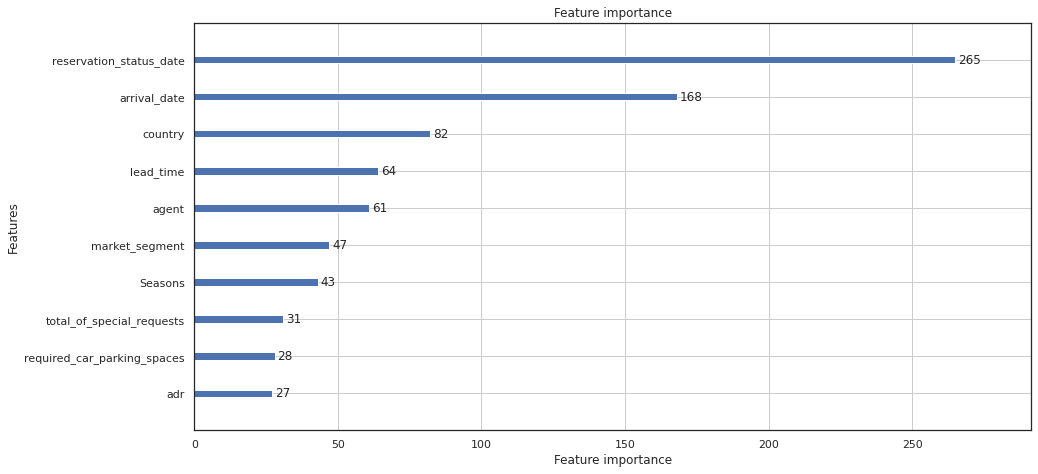

Plotting 10th tree...


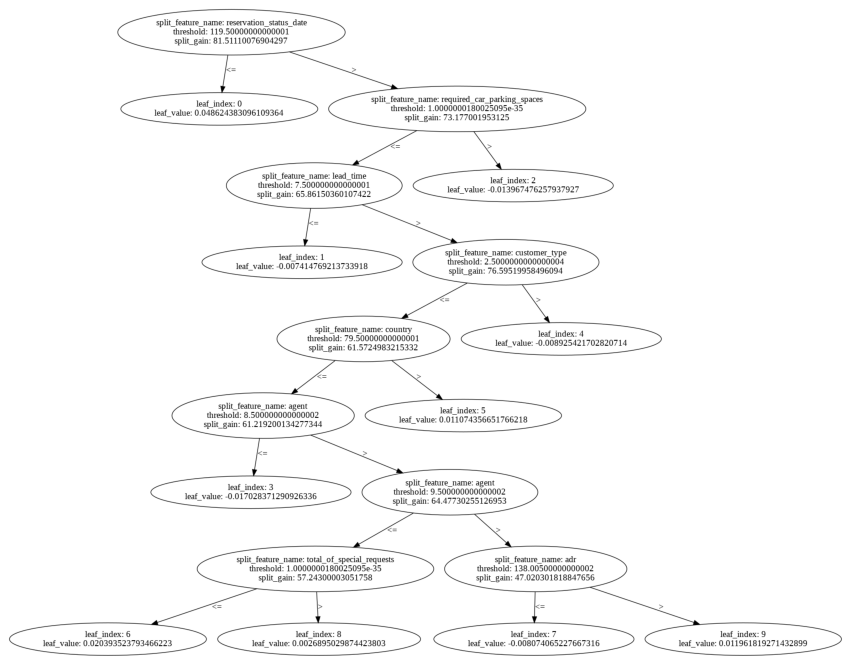

Plotting 10th tree with graphviz...


'Tree10.gv.pdf'

In [ ]:
print('Plotting feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

print('Plotting 10th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbm, tree_index=10, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 10th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=54, name='Tree10')
graph.render(view=True)

In [ ]:
# Показатель для обучающих данных
from sklearn.metrics import r2_score 
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_train_1,gbm.predict(X_train_1)))) 

The R-squared value is: 0.5775 



In [ ]:
# Показатель для тестовых данных
from sklearn.metrics import r2_score 
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_validation_1,y_pred_3))) 

The R-squared value is: 0.7283 



In [ ]:
import seaborn as sns

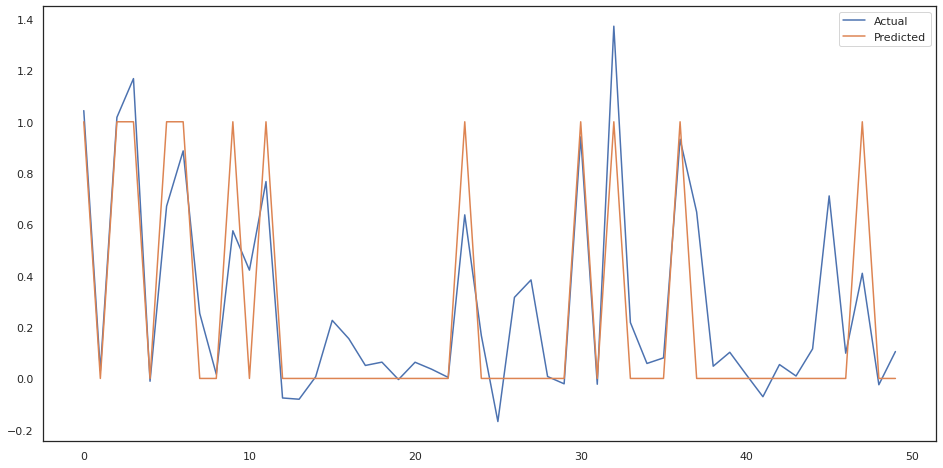

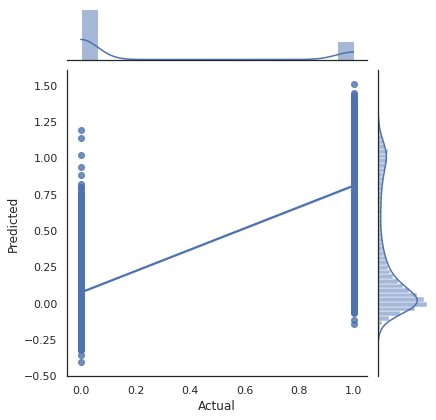

In [ ]:
test = pd.DataFrame({'Predicted':y_pred_3,'Actual':y_validation_1})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

## **Отчет по блокноту**

Используя предоставленный набор данных по бронированиям отелей из библиотеки Kaggle, необходимо было провести анализ данных, и используя модели машинного обучения попробовать предсказать, отменит ли клиент бронирование или нет.
Провели ислледовательский анализ данных, очистили исходный датасет, сократили количество признаков, влияющих на результат, оцифровали категориальные признаки.
Затем обучили модель в нескольких библиотеках.

Получили следующие результаты предсказания (результаты расположены от лучшего к худшему):

**Gradient Boosting Classifier**: R2 score on testing data: 0.87, Test Accuracy: 98%; f1-score 0 - 0.98 1 -0.95 

**XGBoost** : The R-squared value is: 0.8207 (на тестовых)

**CatBoost** The R-squared value is: 0.7300  (на тестовых)

**LightGBM**  The R-squared value is: 0.7283 (на тестовых)





Попробуем убрать дисбаланс классов выходного параметра. 

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res1, y_res1 = sm.fit_resample(X_train, y_train)

In [ ]:
print("After OverSampling, the shape of train_X: {}".format (X_res1.shape))
print("After OverSampling, the shape of train_y: {}".format (y_res1.shape))
print("After OverSampling, counts of label '1': {}".format (sum(y_res1==1)))
print("After OverSampling, counts of label '0': {}".format (sum(y_res1==0)))

After OverSampling, the shape of train_X: (88738, 21)
After OverSampling, the shape of train_y: (88738,)
After OverSampling, counts of label '1': 44369
After OverSampling, counts of label '0': 44369


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_test, y_test)

In [ ]:
print("After OverSampling, the shape of train_X: {}".format (X_res.shape))
print("After OverSampling, the shape of train_y: {}".format (y_res.shape))
print("After OverSampling, counts of label '1': {}".format (sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format (sum(y_res==0)))

After OverSampling, the shape of train_X: (38004, 21)
After OverSampling, the shape of train_y: (38004,)
After OverSampling, counts of label '1': 19002
After OverSampling, counts of label '0': 19002


Обучим модель SKLearn Gradient Boosting Classifier с новыми данными

In [ ]:
GBoost = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100, max_depth=10, random_state=1234)
GBoost.fit(X_res1, y_res1)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, random_state=1234)

In [ ]:
predicted_GBoost = GBoost.predict(X_res)
print('R2 score on testing data: {:.2f}'.format(r2_score(y_res, predicted_GBoost)))
rmse = np.sqrt(mean_squared_error(y_res, predicted_GBoost))
print("RMSE: %f" % (rmse))

R2 score on testing data: 0.92
RMSE: 0.144997


In [ ]:
print(classification_report(y_res, predicted_GBoost))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     19002
           1       0.99      0.96      0.98     19002

    accuracy                           0.98     38004
   macro avg       0.98      0.98      0.98     38004
weighted avg       0.98      0.98      0.98     38004



До применения балансирования данных:
**Gradient Boosting Classifier**:  R2 score on testing data: 0.87, RMSE: 0.157936,Test Accuracy: 98%; f1-score 0 - 0.98 1 -0.95

После применения балансирования данных:
**Gradient Boosting Classifier**: R2 score on testing data: 0.92, RMSE: 0.144997; Test Accuracy: 98%; f1-score 0 - 0.98 1 -0.98 

Показатели модели немного улучшились